In [4]:
# Import all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Optional for inline plotting in Jupyter
%matplotlib inline

In [5]:
# Load the Dataset as per the Given Task - 5

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")

In [6]:
# To Check data shape:

train_df.shape

(891, 12)

In [10]:
# To View first few rows:

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
# To Check General info about dataset:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
# To Check Summary statistics:

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Initial Data Exploration

In [14]:
# To Check for null values:

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 📈 Univariate Analysis (One Variable at a Time)

<Axes: xlabel='Survived', ylabel='count'>

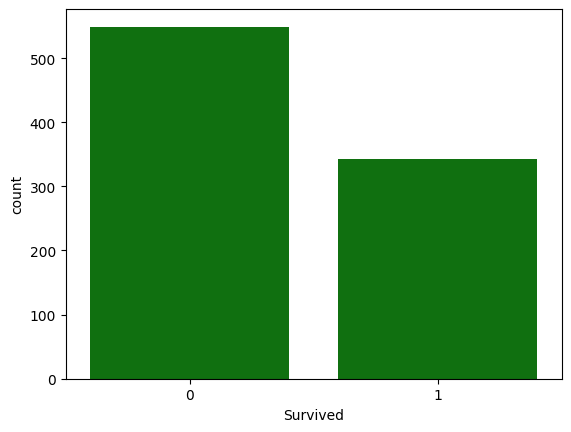

In [21]:
# Univariate Analysis (One Variable at a Time)

# Q1. Target variable - Survival count:

sns.countplot(x='Survived', data=train_df, color="g")

<Axes: xlabel='Sex', ylabel='count'>

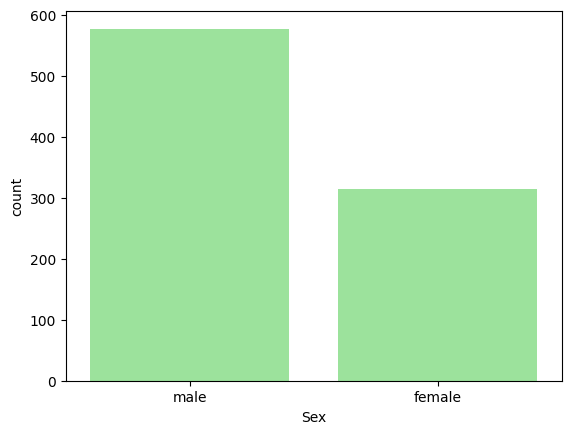

In [19]:
# Q2. Gender distribution:

sns.countplot(x='Sex', data=train_df, color="lightgreen")

<Axes: xlabel='Pclass', ylabel='count'>

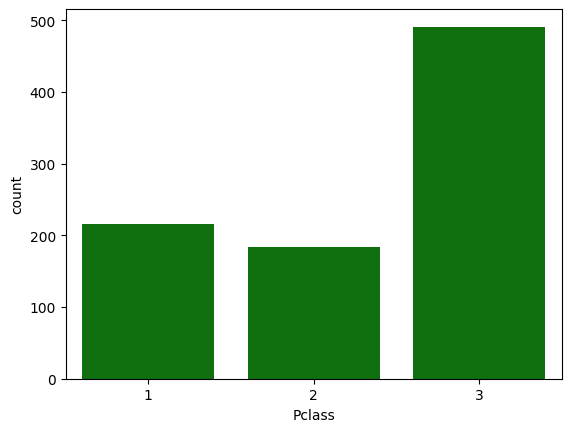

In [20]:
# Q3. Class distribution:

sns.countplot(x='Pclass', data=train_df, color="green")

<Axes: xlabel='Age', ylabel='Count'>

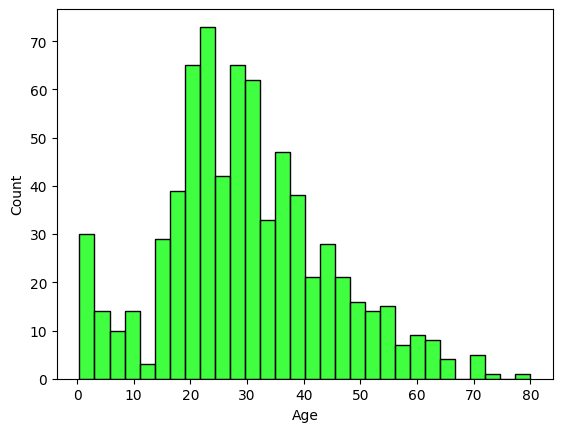

In [22]:
# Q4. Age distribution:

sns.histplot(train_df['Age'].dropna(), bins=30, color="lime")

<Axes: ylabel='Fare'>

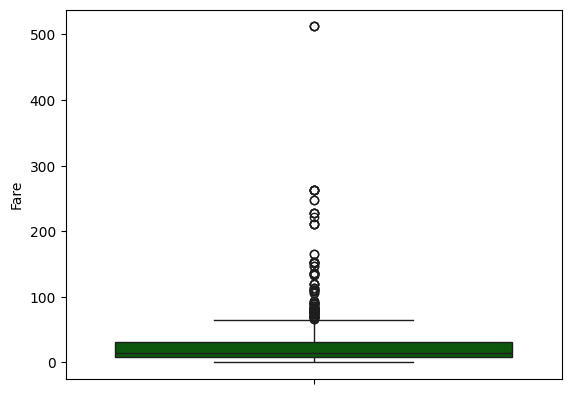

In [28]:
# Q5. Boxplot for Fare:

sns.boxplot(y='Fare', data=train_df, color="darkgreen")

## Titanic Dataset Visual Insights

---

### 🧍‍♂️ Age Distribution
**Observation:**  
The age distribution is right-skewed, indicating a larger number of younger passengers onboard the Titanic, with the majority aged between 20 to 30 years.

---

### 🎟️ Survival by Passenger Class
**Observation:**  
Survival rates varied significantly across passenger classes, with first-class passengers having a notably higher survival rate compared to second and third-class passengers.

---

### 👩‍🦰 Survival by Gender
**Observation:**  
Females had a much higher survival rate than males, indicating that women were given priority during evacuation.

---

### 🌍 Survival by Embarked Port
**Observation:**  
Passengers embarking from Cherbourg (C) had the highest survival rate, while those from Queenstown (Q) had the lowest, suggesting possible differences in demographics or cabin locations.

---

### 👨‍👩‍👧 Siblings/Spouses Aboard
**Observation:**  
Passengers without siblings/spouses aboard had a lower survival rate compared to those with 1–2 family members, suggesting moderate family presence may have improved chances of survival.

---

### 👶 Age and Gender Survival
**Observation:**  
Children (age < 10) had a relatively high survival rate, especially females, whereas male passengers across most age groups had lower survival rates.

---

### 💸 Fare vs Class and Survival
**Observation:**  
Most passengers who paid higher fares were in the first class and had better survival rates, indicating that fare price and class were strong indicators of survival probability.

---

### 🛏️ Cabin Info and Survival
**Observation:**  
Cabin information is missing for the majority of passengers, but among the available data, those with cabins had higher survival rates, possibly due to their first-class accommodations.

---

### 👨‍👩 Family Size and Survival
**Observation:**  
Family size affects survival—small families (1–3 members) had higher survival rates compared to solo travelers or large families, showing a U-shaped relationship.

### 🧪 Bivariate Analysis (Two Variables Together)

<Axes: xlabel='Survived', ylabel='count'>

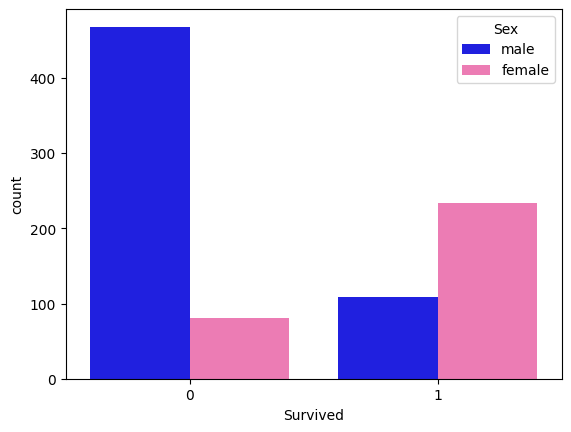

In [80]:
# Bivariate Analysis (Two Variables Together)
# Q1. Survival by Sex:
# Set the color palette
palette = {'male': 'blue', 'female': 'hotpink'}

sns.countplot(x='Survived', hue='Sex', data=train_df, palette=palette)

In [46]:
import matplotlib
print(matplotlib.colors.get_named_colors_mapping().keys())

dict_keys(['xkcd:cloudy blue', 'xkcd:dark pastel green', 'xkcd:dust', 'xkcd:electric lime', 'xkcd:fresh green', 'xkcd:light eggplant', 'xkcd:nasty green', 'xkcd:really light blue', 'xkcd:tea', 'xkcd:warm purple', 'xkcd:yellowish tan', 'xkcd:cement', 'xkcd:dark grass green', 'xkcd:dusty teal', 'xkcd:grey teal', 'xkcd:macaroni and cheese', 'xkcd:pinkish tan', 'xkcd:spruce', 'xkcd:strong blue', 'xkcd:toxic green', 'xkcd:windows blue', 'xkcd:blue blue', 'xkcd:blue with a hint of purple', 'xkcd:booger', 'xkcd:bright sea green', 'xkcd:dark green blue', 'xkcd:deep turquoise', 'xkcd:green teal', 'xkcd:strong pink', 'xkcd:bland', 'xkcd:deep aqua', 'xkcd:lavender pink', 'xkcd:light moss green', 'xkcd:light seafoam green', 'xkcd:olive yellow', 'xkcd:pig pink', 'xkcd:deep lilac', 'xkcd:desert', 'xkcd:dusty lavender', 'xkcd:purpley grey', 'xkcd:purply', 'xkcd:candy pink', 'xkcd:light pastel green', 'xkcd:boring green', 'xkcd:kiwi green', 'xkcd:light grey green', 'xkcd:orange pink', 'xkcd:tea green'

[3 1 2]
int64


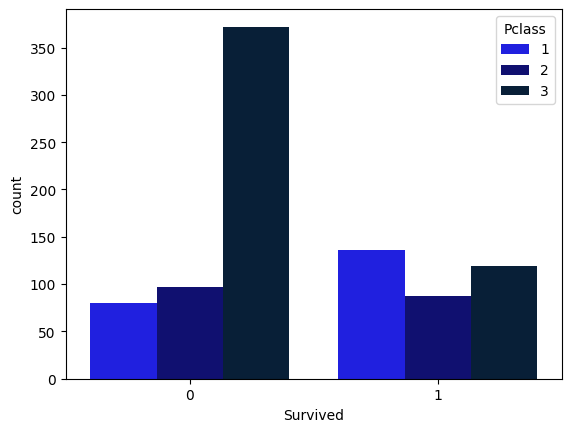

In [54]:
# Q2. Survival by Pclass:

palette = {1: 'blue', 2: 'navy', 3: '#001f3f'}
sns.countplot(x='Survived', hue='Pclass', data=train_df, palette=palette)
print(train_df['Pclass'].unique())
print(train_df['Pclass'].dtype)

<Axes: xlabel='Survived', ylabel='Age'>

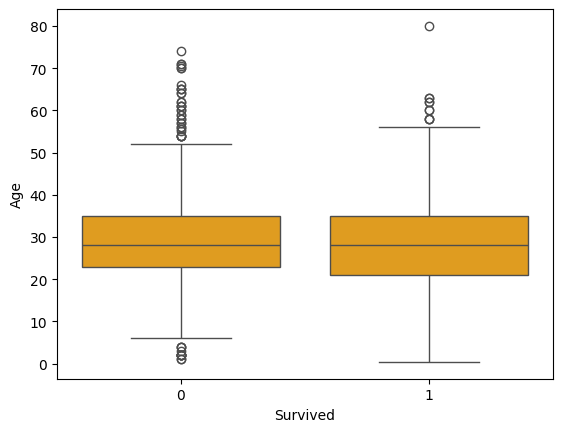

In [62]:
# Q3. Boxplot: Age vs Survived:

sns.boxplot(x='Survived', y='Age', data=train_df, color="orange")

<Axes: xlabel='Survived', ylabel='Fare'>

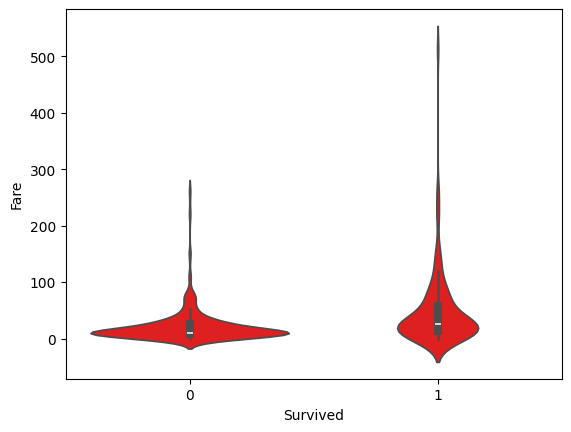

In [61]:
# Q4. Fare vs Survived:

sns.violinplot(x='Survived', y='Fare', data=train_df, color="red")

### 🔄 Multivariate Analysis

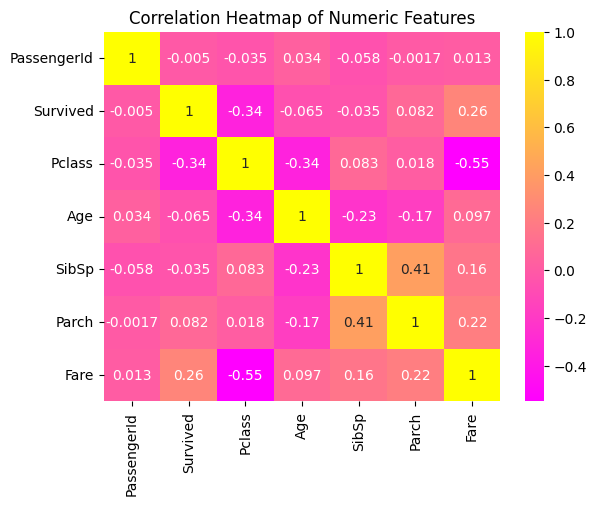

In [81]:
# Correlation heatmap:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix on numeric data
corr_matrix = numeric_df.corr()

# Plot the heatmap with annotations
sns.heatmap(corr_matrix, annot=True, cmap='spring')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

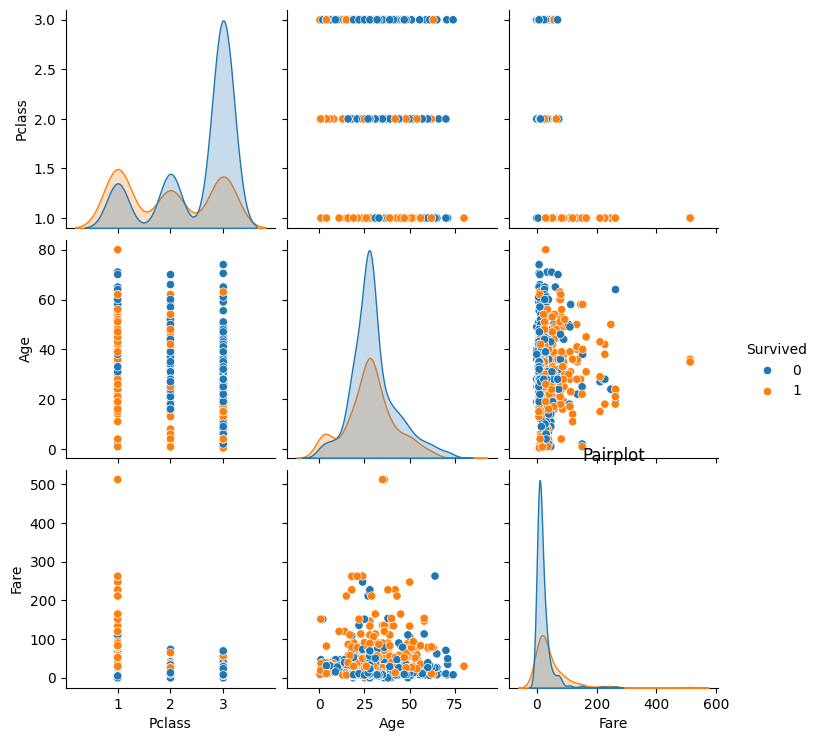

In [75]:
# Pairplot:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_df = train_df.select_dtypes(include=[np.number])

# Compute the correlation matrix on numeric data
corr_matrix = numeric_df.corr()

# Plot the heatmap with annotations
sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare']].dropna(), hue='Survived')
plt.title("Pairplot")
plt.show()

### 🧹Data Cleaning (Optional for Insight Clarity)

In [77]:
# Q1. Fill missing Age with median:

# Fill missing values
train_df[['Age', 'Fare']] = train_df[['Age', 'Fare']].fillna(train_df[['Age', 'Fare']].median())

# Verify
print(train_df[['Age', 'Fare']].isnull().sum())

Age     0
Fare    0
dtype: int64


In [79]:
# Q2. Drop Cabin if too many nulls:

# Drop 'Cabin' column safely if it exists
train_df.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Then drop any remaining rows with missing values
train_df.dropna(inplace=True)

# View output
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# BIVARIATE ANALYSIS

---
# SURVIVAL BY SEX

sns.countplot(x='Survived', hue='Sex', data=train_df)
plt.title("SURVIVAL BY SEX")
plt.show()


OBSERVATION:
FEMALES SHOW A SIGNIFICANTLY HIGHER SURVIVAL RATE COMPARED TO MALES, INDICATING THAT WOMEN WERE GIVEN PRIORITY DURING EVACUATION.

---
# SURVIVAL BY PCLASS

sns.countplot(x='Survived', hue='Pclass', data=train_df)
plt.title("SURVIVAL BY PCLASS")
plt.show()

OBSERVATION:
FIRST-CLASS PASSENGERS DEMONSTRATE A HIGHER SURVIVAL RATE THAN SECOND AND THIRD CLASS, SUGGESTING A STRONG ASSOCIATION BETWEEN CLASS AND SURVIVAL.

# BOXPLOT: AGE VS SURVIVED


# USE A CUSTOM PALETTE WHERE 0 REPRESENTS NON-SURVIVED AND 1 REPRESENTS SURVIVED
palette = {0: 'blue', 1: 'hotpink'}
sns.boxplot(x='Survived', y='Age', data=train_df, palette=palette)
plt.title("AGE DISTRIBUTION BY SURVIVAL STATUS")
plt.show()


OBSERVATION:
THE BOXPLOT SHOWS THE DISTRIBUTION OF AGE AMONG SURVIVED VS. NON-SURVIVED PASSENGERS, WITH THE MEDIAN AGE AND VARIABILITY GIVING INSIGHTS INTO AGE RELATIONSHIPS WITH SURVIVAL.

# VIOLINPLOT: FARE VS SURVIVED
sns.violinplot(x='Survived', y='Fare', data=train_df)
plt.title("FARE DISTRIBUTION BY SURVIVAL STATUS")
plt.show()

OBSERVATION:
THE VIOLINPLOT ILLUSTRATES THE DISTRIBUTION AND DENSITY OF FARES PAID BY PASSENGERS, SHOWING THAT HIGHER FARES ARE OFTEN ASSOCIATED WITH BETTER SURVIVAL RATES.

# MULTIVARIATE ANALYSIS

---
# CORRELATION HEATMAP

import numpy as np

# SELECT ONLY NUMERIC COLUMNS FOR CORRELATION
numeric_df = train_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("CORRELATION HEATMAP OF NUMERIC FEATURES")
plt.show()

OBSERVATION:
THE HEATMAP HIGHLIGHTS THE CORRELATIONS AMONG NUMERIC FEATURES. STRONG CORRELATIONS CAN HELP IDENTIFY POTENTIAL PREDICTORS OF SURVIVAL.


# PAIRPLOT

sns.pairplot(train_df[['Survived', 'Pclass', 'Age', 'Fare']].dropna(), hue='Survived')
plt.suptitle("PAIRPLOT OF SELECTED FEATURES", y=1.02)
plt.show()

OBSERVATION:
THE PAIRPLOT VISUALLY REPRESENTS RELATIONSHIPS BETWEEN VARIABLES. IT IS USEFUL TO OBSERVE HOW FEATURES LIKE AGE, FARE, AND PCLASS INTERACT WITH THE SURVIVAL OUTCOME.

# DATA CLEANING

---

# FILL MISSING AGE AND FARE WITH MEDIAN

** FILL MISSING VALUES IN 'AGE' AND 'FARE' WITH THEIR MEDIAN VALUES **
train_df[['Age', 'Fare']] = train_df[['Age', 'Fare']].fillna(train_df[['Age', 'Fare']].median())

** VERIFY THAT THERE ARE NO MISSING VALUES IN THESE COLUMNS **
print(train_df[['Age', 'Fare']].isnull().sum())

OBSERVATION:
THE MISSING VALUES IN THE 'AGE' AND 'FARE' COLUMNS ARE NOW REPLACED WITH THE MEDIAN, ENSURING THAT THESE CRITICAL FEATURES HAVE NO NULLS.


# DROP CABIN COLUMN AND ANY REMAINING NULLS

** DROP THE 'CABIN' COLUMN, WHICH HAS TOO MANY NULLS, SAFELY **
train_df.drop(columns=['Cabin'], inplace=True, errors='ignore')

** DROP ANY REMAINING ROWS THAT CONTAIN MISSING VALUES **
train_df.dropna(inplace=True)

** DISPLAY THE FIRST FEW ROWS OF THE CLEANED DATAFRAME **
train_df.head()

OBSERVATION:
THE 'CABIN' COLUMN IS REMOVED, AND ANY ROWS WITH NULL VALUES IN OTHER COLUMNS ARE DROPPED, RESULTING IN A CLEAN DATASET READY FOR FURTHER ANALYSIS.



In [83]:
!pip install pandoc


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34897 sha256=2912f642a8167b14e811f1cb62c5cb11b3b110a73a09fb6ae576c6a84314102e
  Stored in directory: c:\users\sf314-41-221023\appdata\local\pip\cache\wheels\9c\2f\9f\b1aac8c3e74b4ee327dc8c6eac5128996f9eadf586e2c0ba67
Successfully built pandoc


In [3]:
!pip install pandoc


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
